<a href="https://colab.research.google.com/github/MariyaJosep/Project-EDA-of-Titanic-Disaster/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Study of Variables**


In [ ]:
#First, we will import the necessary packages and load the data set.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
cols = df.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

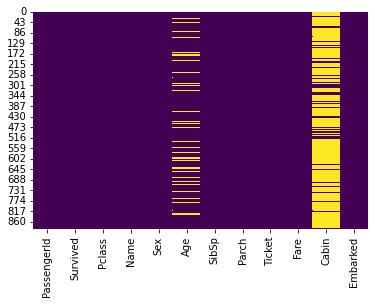

In [ ]:
sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False)

# Since the ‘Embarked’ column has only 2 null values, it's not visible in the heatmap.

**2. Data Cleaning**

In [ ]:
#Since the ‘Cabin’ column has got more NaN values, let's fix it first. 
#The cabin column has the cabin number of the passenger or NaN for those 
#who didn’t have one. Let's create a new column ‘HasCabin’ which has 1 
#if there is a cabin and 0 for NaN.

def create_feat_has_cabin(df, colname):
    # if NA => 0 else 1
    def _is_nan(x):
        if isinstance(x, type(np.nan)):
            return 0
        return 1
        
    return df[colname].apply(_is_nan)
    
df['HasCabin'] = create_feat_has_cabin(df, 'Cabin')

# Now, let's fill NA values of the Embarked column with ‘S’(Southampton)

def fill_na_embarked(df, colname):
    
    return df[colname].fillna('S')
    
df['Embarked'] = fill_na_embarked(df, 'Embarked')

Similarly, the Age column has a lot of missing values. Hence we fill the missing values with random values centered around mean and (spread out) distributed with standard deviation, sd. Let's get the mean and standard deviation first.

In [ ]:
mean = df['Age'].mean()
sd = df['Age'].std()
print(mean,sd)

29.69911764705882 14.526497332334042


The mean of the dataset is 29.48 and the standard deviation of the dataset is 13.53. Hence we fill the missing values by choosing a random number between 16 and 43.

In [ ]:
def fill_na_age(df, colname):
    mean = df['Age'].mean()
    sd = df['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ())
        return x
    return df[colname].apply(fill_empty).astype(int)
df['Age'] = fill_na_age(df, 'Age')

Feature Engineering

In [ ]:
#We have filled all the missing values in our data.
# In this section, we put on our creative hats and think up new features
# that could help our yet-be-built model’s performance.

#First, let's create a new column ‘FamilySize’ by combining
# ‘SibSp’(Sibling & Spouse) and ‘Parch’(Parent & Children).

def create_feat_familly_size(df):
    return df['SibSp'] + df['Parch'] + 1
    
df['FamilySize'] = create_feat_familly_size(df)

In [ ]:
# What about the ones traveling solo? We create a new column named ‘IsAlone’ with 0 and 1.

def create_feat_isalone(df, colname):
    def _is_alone(x):
        if x==1:
            return 1
        return 0
    
    return df[colname].apply(_is_alone)
    
df['IsAlone'] = create_feat_isalone(df, 'FamilySize')

In [ ]:
# As we have seen earlier, the Fare column contains 0’s for some passengers 
#and notoriously high values for some passengers. 
#So lets split the fare into four categories and store 
# it in a new column “CategoricalFare”

def create_feat_categoricalFare(df, colname):
    return pd.qcut(df[colname], 4, labels = [0, 1, 2, 3]).astype(int)
df['CategoricalFare'] = create_feat_categoricalFare(df, 'Fare')

In [ ]:
# Now let's categorize the age into 5 categories and store it into a new column “CategoricalAge”

def create_feat_categoricalAge(df, colname):
    return pd.qcut(df[colname], 5, labels = [0, 1, 2, 3, 4]).astype(int)
df['CategoricalAge'] = create_feat_categoricalAge(df, 'Age')

In [ ]:
# extract the title from each name and categorize the titles into four categories namely Mr, Miss, Mrs & Rare,
# and store it in a new column ‘Title’.

import re
def create_feat_title(df, colname):
    def find_title(x):
        title_search = re.search(' ([A-Za-z]+)\.', x)
        if title_search:
            title = title_search.group(1)
            if title in ['Mlle', 'Ms']:
                return 'Miss'
            elif title in ['Mme', 'Mrs']:
                return 'Mrs'
            elif title=='Mr':
                return 'Mr'           
            else:
                return 'Rare'
        return ""
    
    return_title= df[colname].apply(find_title)
    dict_title = {'Miss': 1, 'Mrs':2, 'Mr':3, 'Rare':4}
    return return_title.replace(dict_title)
df['Title'] = create_feat_title(df, 'Name')

In [ ]:
#we might as well change the values of the Embarked column to numerical.

def create_feat_sex(df, colname):
    def sex(x):
        if x=='male':
            return 1
        return 0
    
    return df[colname].apply(sex)
    
df['SexNumerical'] = create_feat_sex(df, 'Sex')
df['Embarked'] = df.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})

In [ ]:
# Let's check if there are any more null values present in the data frame.

df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
HasCabin             0
FamilySize           0
IsAlone              0
CategoricalFare      0
CategoricalAge       0
Title                0
SexNumerical         0
dtype: int64

In [ ]:
# Time to drop the useless columns.

drop_list = ['PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Name']
titanic = df.drop(drop_list, axis=1)

**3. Correlation Study**

In [ ]:
# We are done with Data Cleaning and Pre-processing.

# Before visualizing the data, let's see the correlation between the variables.

corrmat = titanic.corr()
corrmat

,Survived,Pclass,Age,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title,SexNumerical
Survived,1.000000,-0.338481,-0.061771,0.081629,0.257307,0.106811,0.316912,0.016639,-0.203367,0.299357,-0.028943,0.030949,-0.543351
Pclass,-0.338481,1.000000,-0.299575,0.018443,-0.549500,0.045702,-0.725541,0.065997,0.135207,-0.634271,-0.258409,0.075428,0.131900
Age,-0.061771,-0.299575,1.000000,-0.165092,0.074847,0.004051,0.221215,-0.234268,0.181377,0.054318,0.923139,-0.287545,0.066284
Parch,0.081629,0.018443,-0.165092,1.000000,0.216225,-0.078665,0.036987,0.783111,-0.583398,0.393881,-0.115120,0.021398,-0.245489
Fare,0.257307,-0.549500,0.074847,0.216225,1.000000,0.062142,0.482075,0.217138,-0.271832,0.579345,0.067115,0.021076,-0.182333
Embarked,0.106811,0.045702,0.004051,-0.078665,0.062142,1.000000,0.013774,-0.080281,0.017807,-0.098161,-0.012540,0.121285,-0.116569
HasCabin,0.316912,-0.725541,0.221215,0.036987,0.482075,0.013774,1.000000,-0.009175,-0.158029,0.500936,0.191287,-0.045148,-0.140391
FamilySize,0.016639,0.065997,-0.234268,0.783111,0.217138,-0.080281,-0.009175,1.000000,-0.690922,0.465396,-0.179884,0.101470,-0.200988
IsAlone,-0.203367,0.135207,0.181377,-0.583398,-0.271832,0.017807,-0.158029,-0.690922,1.000000,-0.560279,0.128043,0.074505,0.303646
CategoricalFare,0.299357,-0.634271,0.054318,0.393881,0.579345,-0.098161,0.500936,0.465396,-0.560279,1.000000,0.068054,-0.045563,-0.243613


Positive and Negative values denote Positive and Negative correlation. The first row of the data shows the correlation of each variable with the Target variable ‘Survived’.

For building a good predictive model, we are interested in variables that influence the target variable “Survived”. Positively or negatively. We need to consider the values that are both too high and too low.

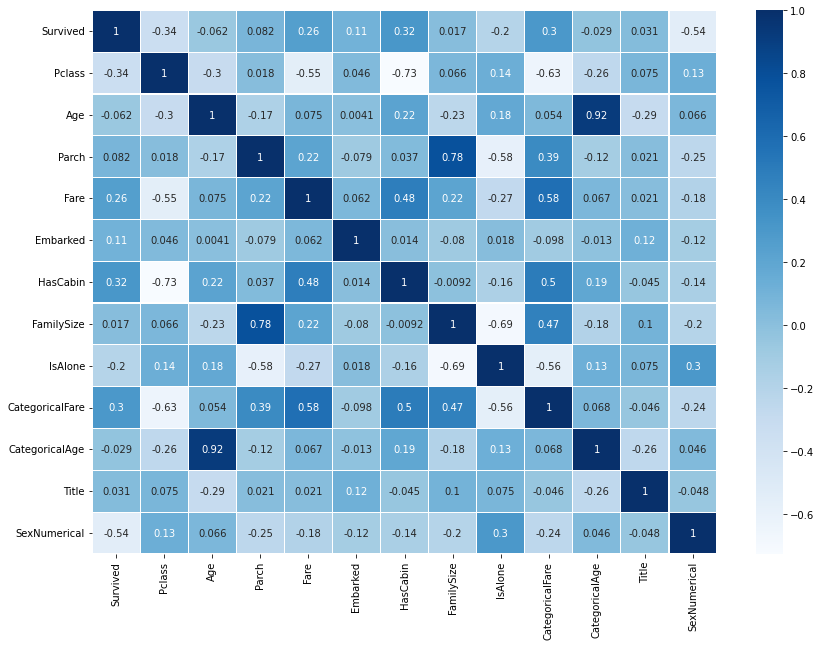

In [ ]:
# correlation heatmap using seaborn

colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(), cmap=colormap, annot=True, linewidths=0.2)

The first row contains the values that represent the correlation of each variable with the target variable. ‘HasCabin’ and ‘CategoricalFare’ are highly (positively) correlated with the target variable and ‘Sex Numerical’ is inversely correlated with the target variable.

**4. Target Variable Analysis (Univariate Analysis)**

In [ ]:
# The Study of the target variable is a significant step in Data Analysis 
#that reveals the nature and distribution of the variable.
# Let’s analyze our target variable “Survived”.

titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


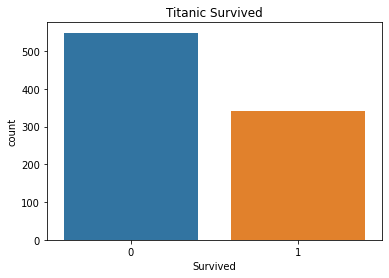

In [ ]:
# From the above result, 342 out of 891 passengers in the training data are survived. 
# Let's plot it using count plot.
sns.countplot('Survived', data=titanic)
plt.title("Titanic Survived")
plt.show()

From the above plot, the number of people who survived is less than the number of people who are died. Now let's see what percentage of passengers survived using a pie plot.

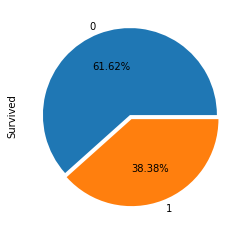

In [ ]:
explode = [0, 0.05]
titanic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

From the above chart, 38% of the passengers are only survived based on this training data. Clearly, there is an imbalance between the classes.

**5. Bivariate Analysis**

In [ ]:
# Let's analyze the ‘Pclass’ column since it is highly correlated with the target variable.

titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

The above result shows the breakup of passengers based on Pclass and Survived. But still, we cannot see the percentage of survival with this data. So let's plot Pclass along with the Survived to have a better picture of the data.

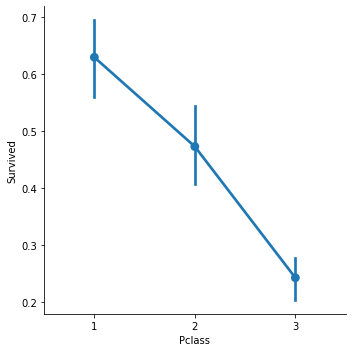

In [ ]:
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='point')

It shows point estimates and confidence intervals. The point estimates indicate the central tendency of a variable while the confidence intervals indicate the uncertainty around this estimate. From the above plot, it is very clear that the first Class passengers had the highest Survival rate when compared to the other class passengers.

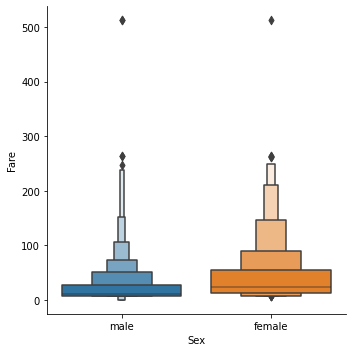

In [ ]:
# Let's see one more example of bivariate analysis by comparing Sex and Fare.

sns.catplot(x='Sex', y='Fare', data=titanic, kind='boxen')

The enhanced box plot shown above indicates that the fare of “Female” passengers is on average higher than male passengers. It could be because of the additional services offered to female passengers.

**6. Multivariate Analysis**

Multivariate Analysis helps us in mining for a deeper understanding of the relationship between variables when compared to Bivariate Analysis. The latter assumes that the relationship between a variable X and the target variable Y is independent of the rest of the variables, (i.e) f(X, Y) doesn't depend on a third variable Z. This limiting assumption could be dangerous. For instance, “Women and children first” is a naval code of conduct followed since 1852, whereby the lives of women and children were to be saved first in a life-threatening situation. As we already know, “Survival” is highly correlated with “Sex”. But a third variable “Age” (child) influences the relationship between “Survival” and “Sex”.

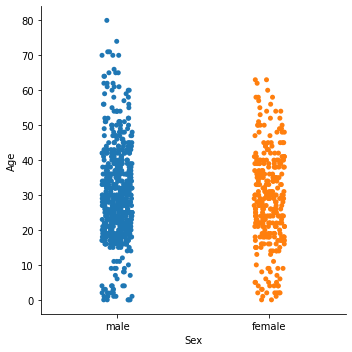

In [ ]:
#analyze the data with three variables, and then we will learn to model the relationship
# between four variables. Let's compare ‘Sex’ and ‘Age’.

sns.catplot(x='Sex', y='Age', data=titanic)

From the above graph, we can see that some of the very old men were traveling. But we couldn't get much information by comparing age and sex.

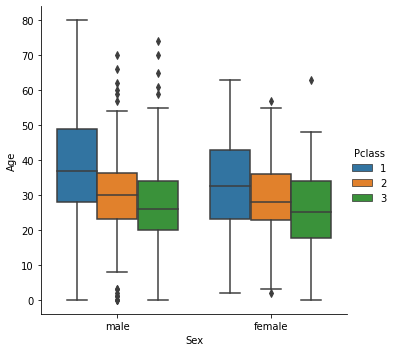

In [ ]:
# let's include the third parameter “Pclass” and try to understand it better.

sns.catplot(x='Sex', y='Age', data=titanic, kind='box', hue='Pclass')

From the above plot, we infer that most of the older people were traveling in first class. It may be because they were rich. The youngsters who are aged between 25 and 35 were mostly traveling in second and third classes.

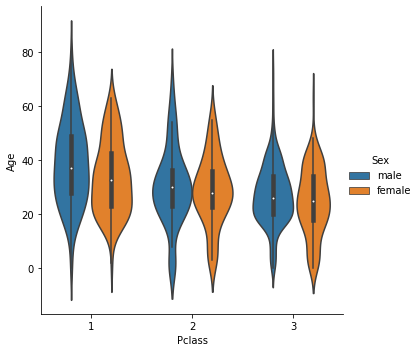

In [ ]:
# we can see it better using a violin plot.

sns.catplot(x='Pclass', y='Age', data=titanic, kind='violin', hue='Sex')

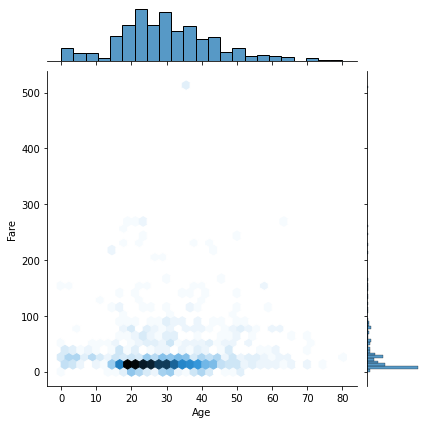

In [ ]:
# Now let's see how to compare four variables. Let's take ‘Age’ and ‘Fare’.
# Note that both are continuous variables.

sns.jointplot(x='Age', y='Fare', data=titanic, kind='hex')

The average passengers were aged between 20 and 40, the average Fare is about $20 to $50. We couldn't understand much from the previous plot. I present below a better view of the data that includes “Sex” and “Pclass” along with “Age” and “Fare”.

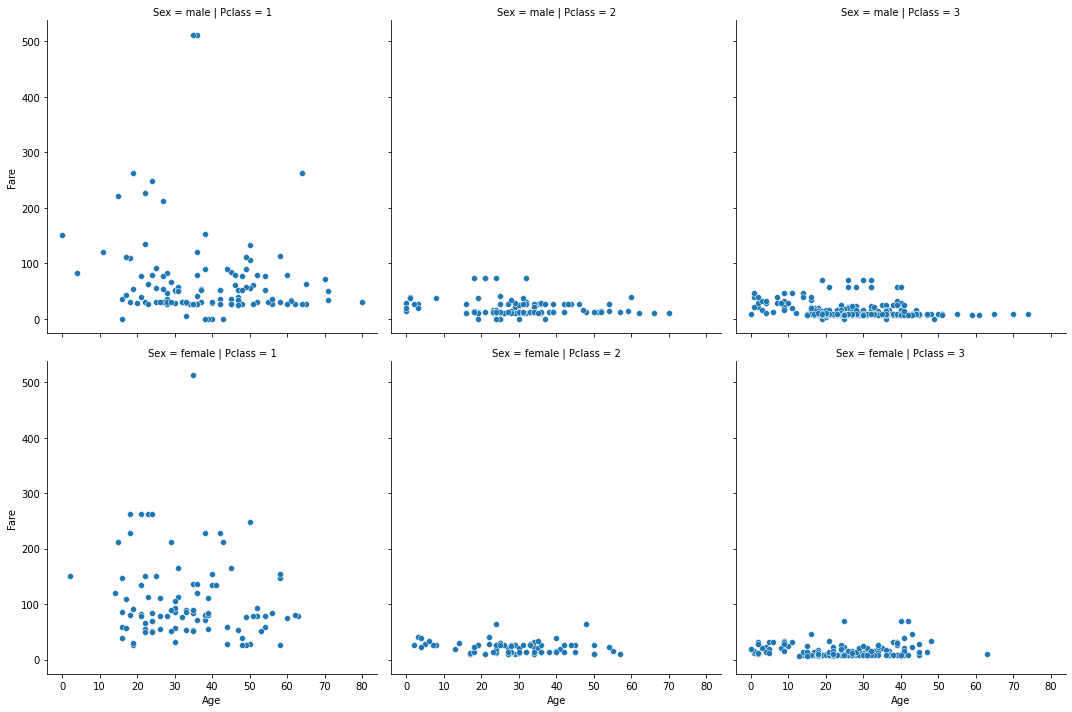

In [ ]:
sns.relplot(x='Age', y='Fare', data=titanic, row='Sex', col='Pclass')

From the above plots, we observe that there were more male passengers who traveled in first-class than women passengers. The Fare for first-class female passengers was higher than male passengers. There is no big difference in Fare for second and third-class passengers. Very few children traveled in first class. The third class had more children. Most of the second and third-class passengers were aged between 20 and 40.